In [2]:
!pip install missingno MissForest lazypredict

In [3]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import shap
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
import joblib

In [4]:
from google.colab import files
uploaded = files.upload()

Saving idealista.csv to idealista.csv


In [5]:
df = pd.read_csv('idealista.csv').iloc[:,1:]
df.set_index('ASSETID', inplace=True)
pd.set_option('display.max_columns', None)
df.head()

,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1939157683777299681,201803,127000,1209.52,HOME,SALE,105,3,2,0,0,1,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,1.00,1999,10,48,5.00,0,0,1,4.39,1.37,2.00,-3.67,40.39,Madrid,HOME,SALE
A17835985663475884501,201803,291000,2910.00,HOME,SALE,100,3,2,1,1,0,3,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,NaN,3.00,1.00,2016,9,102,4.00,0,0,1,9.33,0.10,7.39,-3.61,40.37,Madrid,HOME,SALE
A3825132123082147094,201812,198000,1960.40,HOME,SALE,101,4,2,1,0,0,3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,NaN,2.00,1.00,1976,11,163,5.00,0,0,1,8.74,1.04,7.24,-3.61,40.38,Madrid,HOME,SALE
A4827218792989485200,201806,626000,6019.23,HOME,SALE,104,3,2,0,1,1,3,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1971.00,4.00,2.00,1971,7,16,4.00,0,0,1,3.07,0.12,1.04,-3.68,40.43,Madrid,HOME,SALE
A9324548227923739927,201812,247000,2744.44,HOME,SALE,90,4,2,1,1,0,3,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,NaN,1.00,1.00,1997,6,151,4.00,0,1,0,7.40,0.38,6.20,-3.62,40.40,Madrid,HOME,SALE


In [6]:
df.shape

(10000, 45)

In [7]:
unicos = df.nunique()
df[unicos[unicos==1].index]

,ADTYPOLOGYID,ADOPERATIONID,CITYNAME,ADTYPOLOGY,ADOPERATION
ASSETID,,,,,
A1939157683777299681,HOME,SALE,Madrid,HOME,SALE
A17835985663475884501,HOME,SALE,Madrid,HOME,SALE
A3825132123082147094,HOME,SALE,Madrid,HOME,SALE
A4827218792989485200,HOME,SALE,Madrid,HOME,SALE
A9324548227923739927,HOME,SALE,Madrid,HOME,SALE
...,...,...,...,...,...
A3680294233477160420,HOME,SALE,Madrid,HOME,SALE
A14052961987227389669,HOME,SALE,Madrid,HOME,SALE
A251613575980724033,HOME,SALE,Madrid,HOME,SALE


# Identificar y eliminar columnas con valores contantes

In [8]:
df.drop(unicos[unicos==1].index, axis=1, inplace=True)

In [9]:
df.shape

(10000, 40)

# Eliminamos filas y columnas duplicadas

In [10]:
# Comporbar ducpliados
df.duplicated().sum()

np.int64(0)

In [11]:
df.T.duplicated().sum()

np.int64(1)

In [12]:
df.T.duplicated(keep=False)

,0
PERIOD,False
PRICE,False
UNITPRICE,False
CONSTRUCTEDAREA,False
ROOMNUMBER,False
BATHNUMBER,False
HASTERRACE,False
HASLIFT,False
HASAIRCONDITIONING,False
AMENITYID,False


In [13]:
df.drop('ISPARKINGSPACEINCLUDEDINPRICE', axis=1, inplace=True)

# Eliminar columnas redundantes

In [14]:
df.drop(['HASWESTORIENTATION', 'BUILTTYPEID_3'], axis=1, inplace=True)

# Eliminar columnas Data leakage

Precio por metro cuadrado

In [15]:
df.drop('UNITPRICE', axis=1, inplace=True)

# Valores faltantes

mnar, mar, mcar...

In [16]:
df.shape

(10000, 36)

In [17]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0
CONSTRUCTIONYEAR,59.50
FLOORCLEAN,4.29
FLATLOCATIONID,6.67


In [18]:
df.drop('CONSTRUCTIONYEAR', axis=1, inplace=True)

In [19]:
df.isnull().any(axis=1).sum()

np.int64(951)

In [20]:
n = 2
df[df.isnull().sum(axis=1) ==n]

,PERIOD,PRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1696293711307168754,201812,155000,64,3,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1955,7,29,6.00,0,0,3.33,0.29,1.97,-3.67,40.40
A13832448960582849169,201812,730000,115,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,1880,5,10,5.00,0,0,1.00,0.16,0.47,-3.70,40.42
A12901108998556854576,201806,526000,126,3,2,1,1,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,2002,6,92,3.00,0,0,6.71,0.72,3.11,-3.72,40.47
A12372952549790290789,201812,397000,80,3,1,0,1,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,1969,7,33,5.00,0,0,2.35,0.22,1.02,-3.68,40.43
A16151247174096403563,201803,117000,59,2,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0,0,NaN,NaN,1981,3,9,6.00,0,0,3.91,0.51,2.15,-3.67,40.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3038932905484539523,201803,87000,81,3,2,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1968,4,11,6.00,0,0,4.05,0.35,4.51,-3.75,40.40
A5841467695184470531,201812,43000,41,2,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1945,2,9,6.00,0,0,4.32,0.31,2.87,-3.66,40.40
A1325028210329869186,201812,664000,115,3,2,1,1,0,3,0,1,0,0,0,1,0,1,0,1,0,0,0,NaN,NaN,1965,6,25,6.00,1,0,4.44,0.33,1.62,-3.67,40.45


<Axes: >

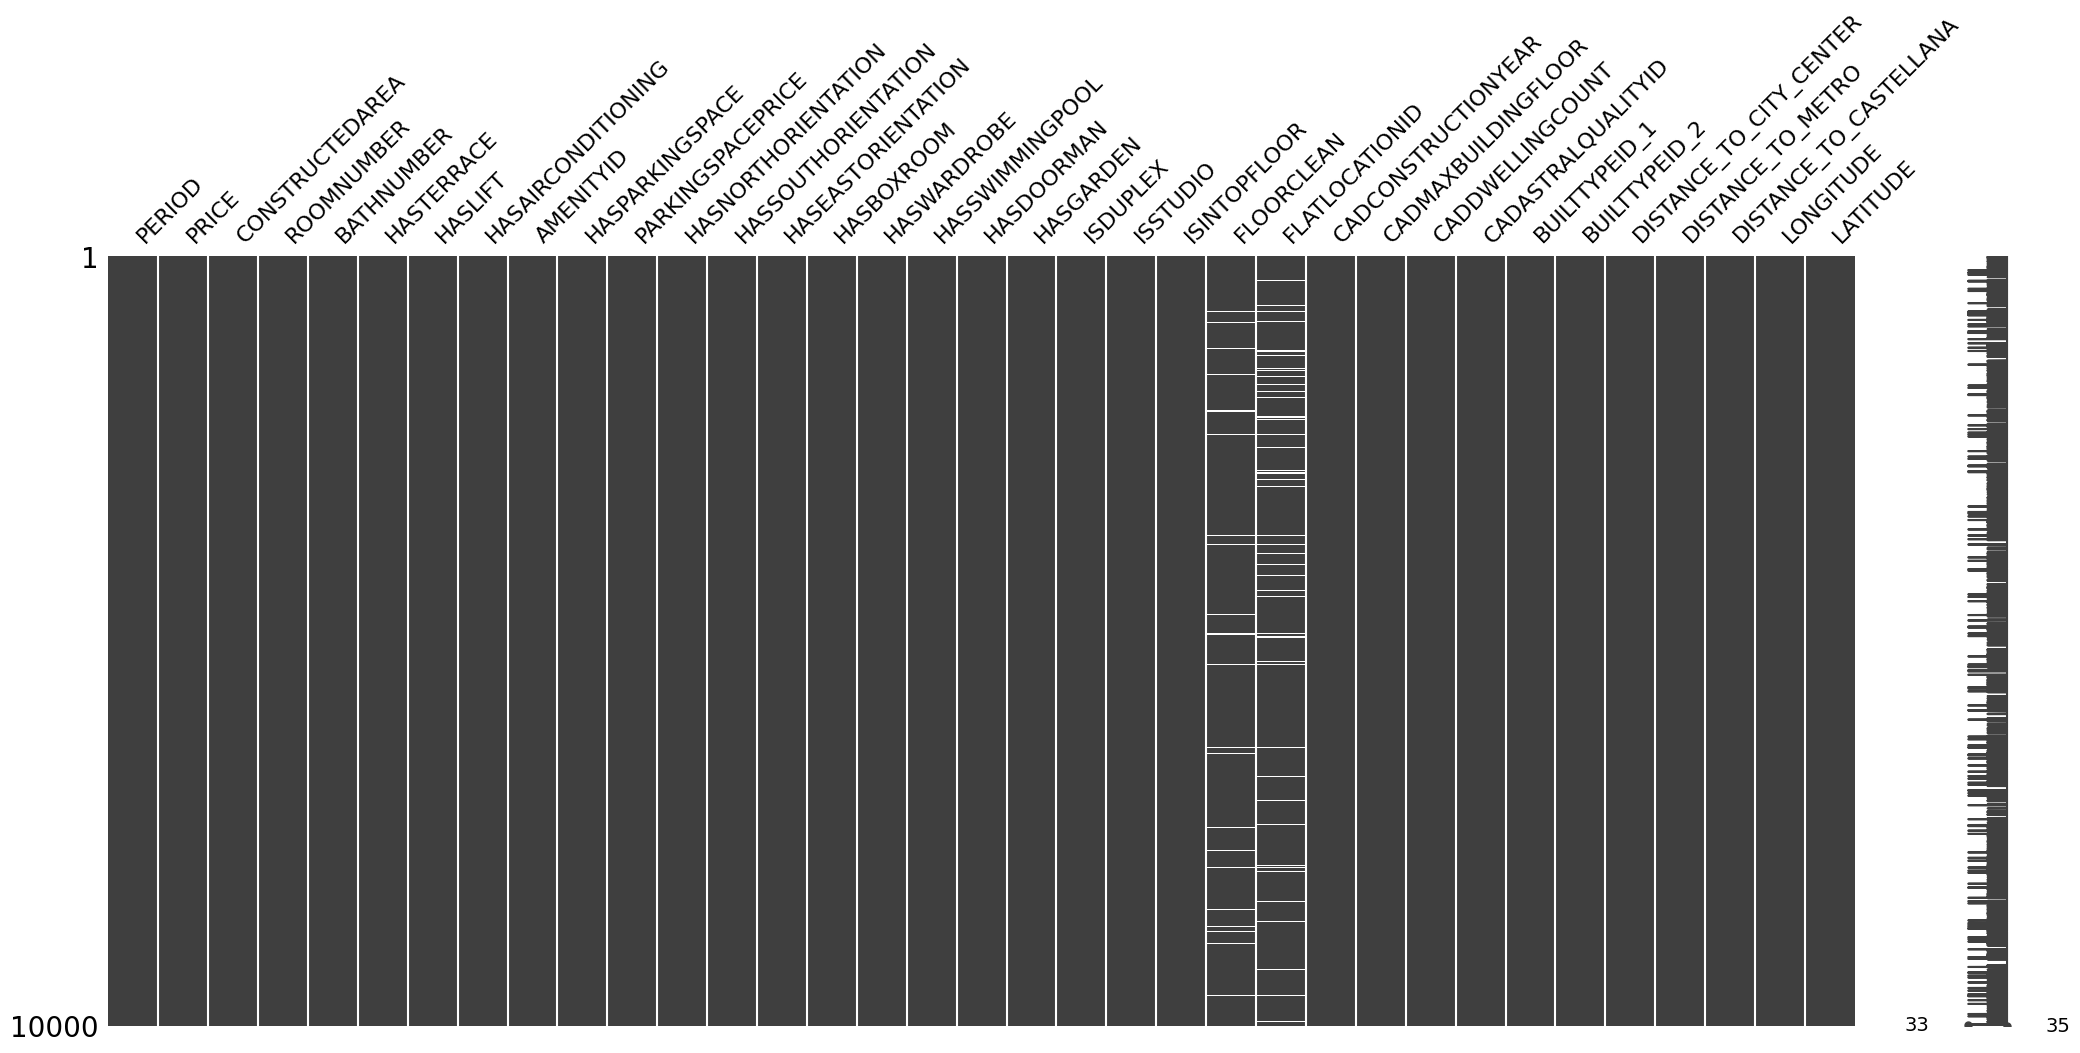

In [21]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

# Train test split

Separamos la variable objetivo/dependiente/explicada (y) de las independientes/explicativas (X)

In [22]:
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar

In [24]:
X_train[['FLOORCLEAN','FLATLOCATIONID']]

,FLOORCLEAN,FLATLOCATIONID
ASSETID,,
A2115850604417636282,9.00,1.00
A2814819676552199562,1.00,1.00
A12002218746062937880,2.00,1.00
A178249139498939300,5.00,1.00
A15760087023847595025,1.00,1.00
...,...,...
A4017483213047785572,8.00,1.00
A14162461971657911661,1.00,1.00
A12724086012317102083,1.00,1.00


In [25]:
X_train['FLOORCLEAN'].value_counts(normalize=True)*100

,proportion
FLOORCLEAN,
1.00,22.93
2.00,18.90
3.00,16.27
4.00,12.29
0.00,11.37
5.00,6.52
6.00,4.00
7.00,2.42
8.00,1.53


In [26]:
X_train['FLATLOCATIONID'].value_counts(normalize=True)*100

,proportion
FLATLOCATIONID,
1.00,86.01
2.00,13.99


In [27]:
imputer = MissForest(categorical=['FLATLOCATIONID','FLOORCLEAN'])
X_train_imp = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

100%|██████████| 5/5 [00:00<00:00,  8.32it/s]


In [28]:
X_train_imp['FLATLOCATIONID'].value_counts(normalize=True)*100

,proportion
FLATLOCATIONID,
1.00,86.83
2.00,13.18


In [29]:
X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

100%|██████████| 5/5 [00:00<00:00, 23.90it/s]


## Codificación de variables categóricas

- map Género, 1,2,3

- target encoding

- frecuency encoding

- one-hot encoding

## Extracción de características

In [30]:
X_train_imp.shape

(8000, 34)

# Outliers

In [31]:
X_train_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
PERIOD,8000.00,201808.58,3.72,201803.00,201806.00,201809.00,201812.00,201812.00
CONSTRUCTEDAREA,8000.00,100.62,64.93,21.00,61.00,83.00,119.00,806.00
ROOMNUMBER,8000.00,2.57,1.18,0.00,2.00,3.00,3.00,12.00
BATHNUMBER,8000.00,1.57,0.80,0.00,1.00,1.00,2.00,11.00
HASTERRACE,8000.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
HASLIFT,8000.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
HASAIRCONDITIONING,8000.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
AMENITYID,8000.00,2.92,0.31,1.00,3.00,3.00,3.00,3.00
HASPARKINGSPACE,8000.00,0.22,0.42,0.00,0.00,0.00,0.00,1.00
PARKINGSPACEPRICE,8000.00,748.51,6581.10,1.00,1.00,1.00,1.00,250001.00


In [32]:
iso = IsolationForest(random_state=123)
df_num = X_train_imp.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train_imp)

In [33]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
1,6512
-1,1488


# Selección de características

## Método 1: Feature importance de RF

In [34]:
# Entrenamiento de RF
model = RandomForestRegressor(random_state=42,n_jobs=-1).fit(X_train_imp, y_train)

In [35]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train_imp.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [36]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
1,CONSTRUCTEDAREA,77.38,77.38
31,DISTANCE_TO_CASTELLANA,4.91,82.29
33,LATITUDE,4.05,86.34
29,DISTANCE_TO_CITY_CENTER,2.60,88.94
32,LONGITUDE,1.97,90.91
26,CADASTRALQUALITYID,1.60,92.51
3,BATHNUMBER,1.31,93.81
30,DISTANCE_TO_METRO,0.87,94.68
21,FLOORCLEAN,0.74,95.42
23,CADCONSTRUCTIONYEAR,0.66,96.08


## Método 2: Permutation/Shuffle importance

In [37]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train_imp, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

In [38]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')

In [39]:
df_perm_imp = pd.DataFrame({'feature': X_train.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
1,CONSTRUCTEDAREA,37.20
29,DISTANCE_TO_CITY_CENTER,14.82
33,LATITUDE,14.45
31,DISTANCE_TO_CASTELLANA,6.81
32,LONGITUDE,3.41
3,BATHNUMBER,2.61
5,HASLIFT,1.94
23,CADCONSTRUCTIONYEAR,1.60
26,CADASTRALQUALITYID,1.57
21,FLOORCLEAN,1.41


## Método 3: SHAP

In [40]:
# Ajustamos el modelo
model_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1).fit(X_train1, y_train1)

explainer = shap.Explainer(model_lgbm, X_val)   # usa el mismo X_val
shap_vals = explainer(X_val).values

In [41]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap_imp = pd.DataFrame({"feature": X_val.columns, "shap_imp": imp_shap_pct}).sort_values('shap_imp', ascending=False)
df_shap_imp

,feature,shap_imp
1,CONSTRUCTEDAREA,31.79
29,DISTANCE_TO_CITY_CENTER,12.70
33,LATITUDE,12.29
31,DISTANCE_TO_CASTELLANA,8.94
3,BATHNUMBER,6.46
32,LONGITUDE,4.89
21,FLOORCLEAN,3.16
5,HASLIFT,3.00
15,HASSWIMMINGPOOL,2.92
26,CADASTRALQUALITYID,2.64


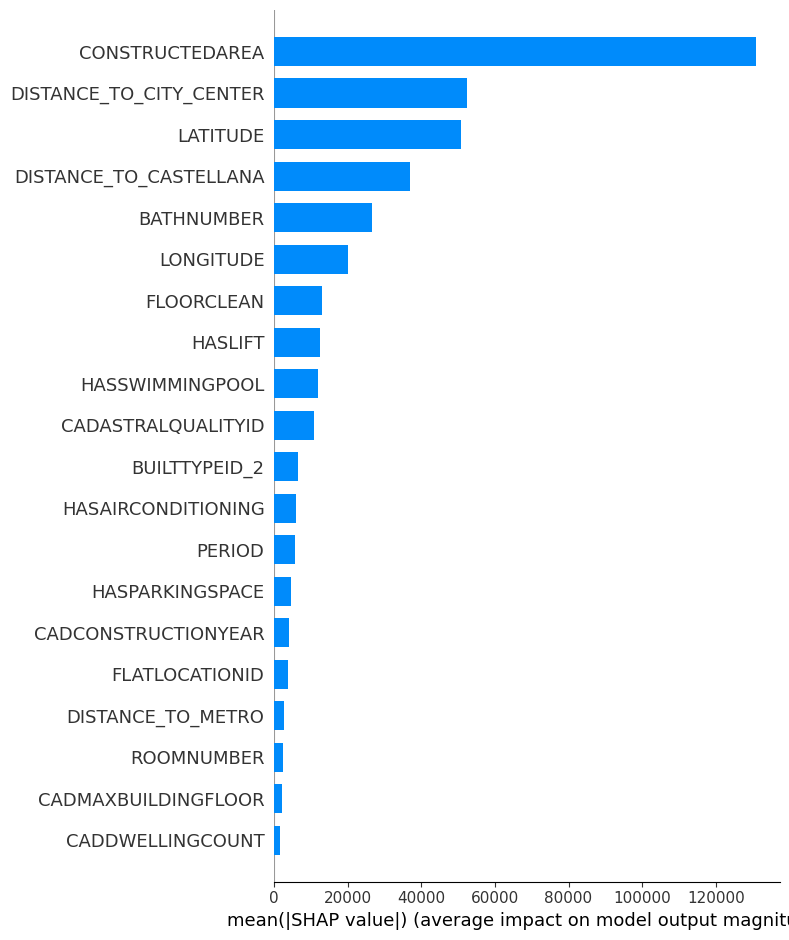

In [42]:
# --- SHAP Summary Bar Plot ---
shap.summary_plot(shap_vals, X_val, plot_type="bar")

## Unión 3 métodos

In [43]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
8,CONSTRUCTEDAREA,77.38,77.38,37.20,31.79
9,DISTANCE_TO_CASTELLANA,4.91,82.29,6.81,8.94
29,LATITUDE,4.05,86.34,14.45,12.29
10,DISTANCE_TO_CITY_CENTER,2.60,88.94,14.82,12.70
30,LONGITUDE,1.97,90.91,3.41,4.89
4,CADASTRALQUALITYID,1.60,92.51,1.57,2.64
1,BATHNUMBER,1.31,93.81,2.61,6.46
11,DISTANCE_TO_METRO,0.87,94.68,0.73,0.63
13,FLOORCLEAN,0.74,95.42,1.41,3.16
5,CADCONSTRUCTIONYEAR,0.66,96.08,1.60,0.96


In [44]:
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm_imp']>=1)&(df_importances['shap_imp']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
8,CONSTRUCTEDAREA,77.38,77.38,37.20,31.79
9,DISTANCE_TO_CASTELLANA,4.91,82.29,6.81,8.94
29,LATITUDE,4.05,86.34,14.45,12.29
10,DISTANCE_TO_CITY_CENTER,2.60,88.94,14.82,12.70
30,LONGITUDE,1.97,90.91,3.41,4.89
4,CADASTRALQUALITYID,1.60,92.51,1.57,2.64
1,BATHNUMBER,1.31,93.81,2.61,6.46


# OPCIONAL PARA LA PRÁCTICA DEL EDA

In [45]:
features = df_filt['feature']
features

,feature
8,CONSTRUCTEDAREA
9,DISTANCE_TO_CASTELLANA
29,LATITUDE
10,DISTANCE_TO_CITY_CENTER
30,LONGITUDE
4,CADASTRALQUALITYID
1,BATHNUMBER


In [46]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train_imp[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
CONSTRUCTEDAREA,2.70
DISTANCE_TO_CASTELLANA,3.66
LATITUDE,1.53
DISTANCE_TO_CITY_CENTER,3.78
LONGITUDE,1.26
CADASTRALQUALITYID,1.27
BATHNUMBER,2.73


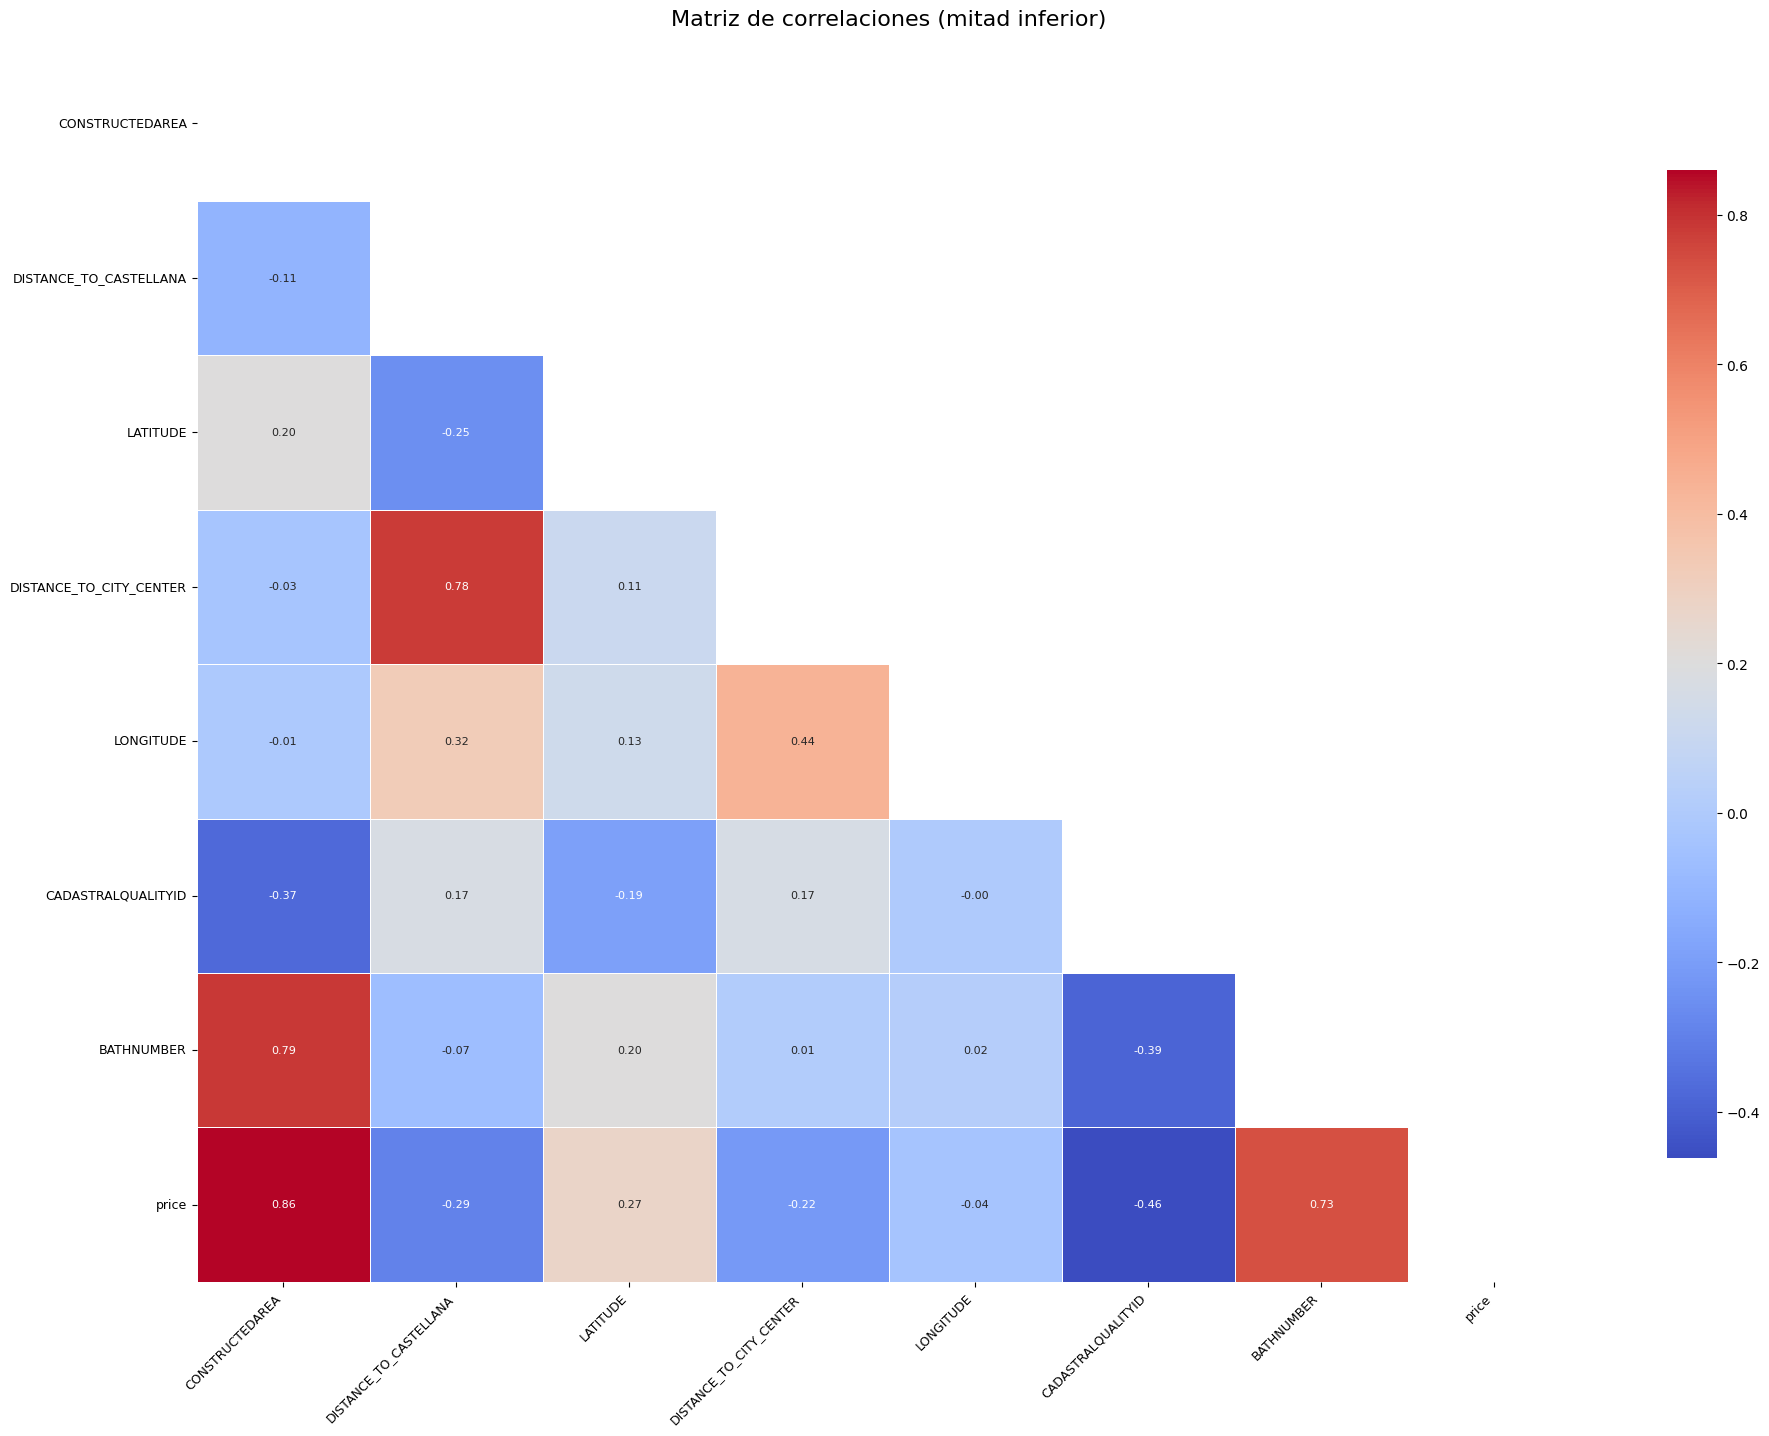

In [47]:
X_copy = X_train_imp[features].copy()
X_copy['price'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

## Cross_validation

Tras identificar las variables candidatas para nuestro modelo observamos que existe una alta correlación entre algunas de ellas. Aquí tenemos varias opciones como podrían ser:

  - Eliminar aquellas con menor importancia y dejar las que presenten una mayor correlación con la variable precio.

  - Combinarlas en una sola:
    - Media de las distancias.
    - Area/num cuartos de baños.

Si tenemos distintas hipótesis y no sabemos cual de ellas elegir una buena forma es realizar la validación cruzada. Que consiste en usar una parte de los datos de train para validar el algoritmo con los datos que le pasemos.

In [48]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results1 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train_imp[features], y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [49]:
cv_results1.mean()*-1

np.float64(0.19269994237140575)

In [50]:
# Versión 2: Realizar cross_validation con  las características que son candidatas sin las correlacionadas
cv_results2 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train_imp[features].drop(['DISTANCE_TO_CITY_CENTER','BATHNUMBER'],axis=1), y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [51]:
cv_results2.mean()*-1

np.float64(0.19747908012686613)

# Modelado

In [52]:
# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train[features]
X_test_sel = X_test[features]

In [53]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
CONSTRUCTEDAREA,8000.00,100.62,64.93,21.00,61.00,83.00,119.00,806.00
DISTANCE_TO_CASTELLANA,8000.00,2.71,2.23,0.00,1.05,2.01,3.90,12.50
LATITUDE,8000.00,40.42,0.03,40.33,40.40,40.42,40.44,40.52
DISTANCE_TO_CITY_CENTER,8000.00,4.50,2.69,0.01,2.42,4.11,6.26,14.09
LONGITUDE,8000.00,-3.69,0.04,-3.83,-3.71,-3.69,-3.67,-3.54
CADASTRALQUALITYID,8000.00,4.86,1.48,0.00,4.00,5.00,6.00,9.00
BATHNUMBER,8000.00,1.57,0.80,0.00,1.00,1.00,2.00,11.00


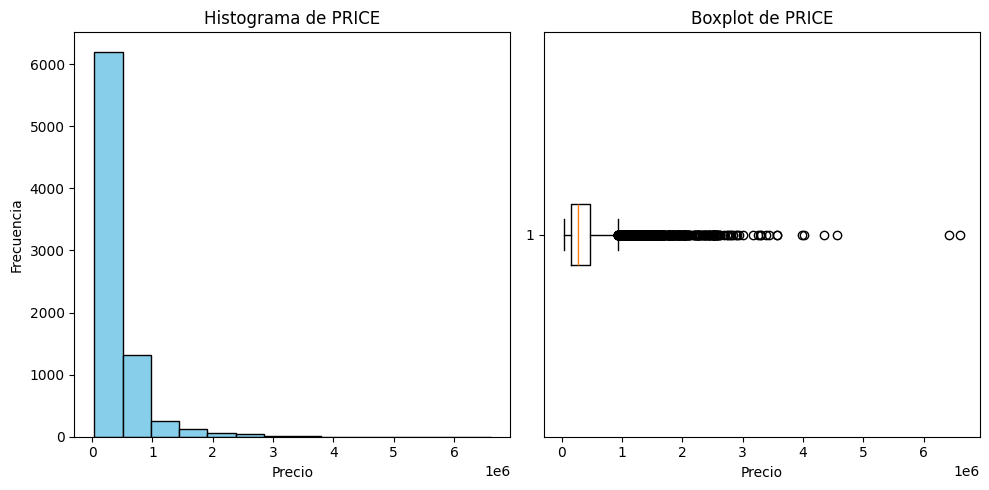

In [54]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [55]:
y_train.skew()

np.float64(3.860801041846486)

In [56]:
y_train.describe()

,PRICE
count,8000.00
mean,392035.75
std,404545.59
min,34000.00
25%,159000.00
50%,261000.00
75%,465250.00
max,6605000.00


In [57]:
# Transformamos la variable respuesta en escala logarítmica
y_train = np.log(y_train)
y_test = np.log(y_test)

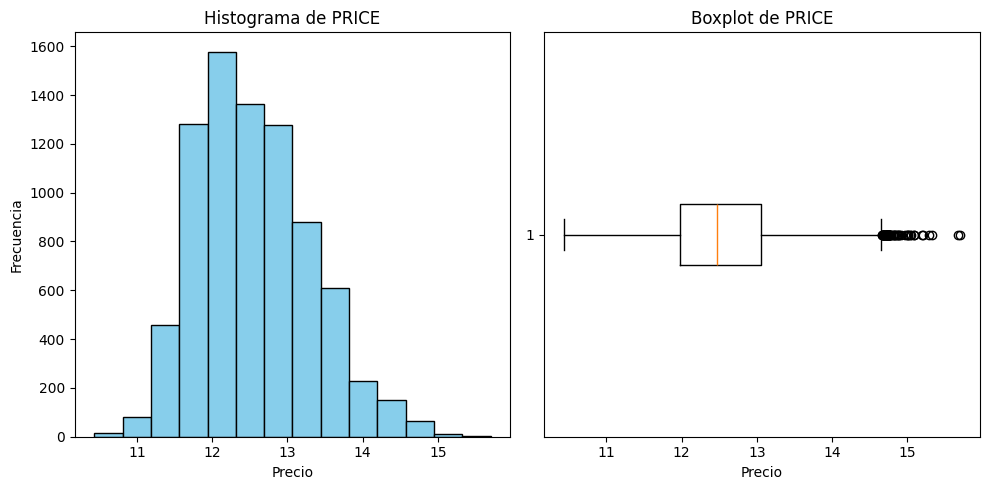

In [58]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

## Escalar los datos

- Pasar de una escala a otra.

  - Estandarizar: Media 0 desviación típica 1: Si creemos que nuestros datos siguen una distribución normal. StandardScaler.

  - Normalizar: Los datos se pasan a un rango de 0 a 1 . Si creemos que conocemos el valor máx y mínimo de las variables. MinMaxScaler.



In [59]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_sel)
X_test_sc = scaler.transform(X_test_sel)

## Comparativa de algoritmos

In [60]:
# Tenemos que obtener un conjunto de validación para validar la decisión de qué algoritmo elegir
X_train_sc1, X_val_sc, y_train1, y_val = train_test_split(X_train_sc, y_train, test_size=0.2, random_state=42)

In [61]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_sc1, X_val_sc, y_train1, y_val)

  0%|          | 0/42 [00:00<?, ?it/s]

In [62]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.90,0.90,0.23,0.44
ExtraTreesRegressor,0.90,0.90,0.23,1.89
LGBMRegressor,0.90,0.90,0.23,0.16
XGBRegressor,0.89,0.89,0.24,0.28
RandomForestRegressor,0.89,0.89,0.24,5.66
SVR,0.89,0.89,0.24,1.90
NuSVR,0.89,0.89,0.24,2.26
GradientBoostingRegressor,0.88,0.88,0.25,2.03
BaggingRegressor,0.88,0.88,0.25,0.53


## Búsqueda de hiperparámetros

### Búsqueda extensiva

In [63]:
# Espacio de búsqueda
param_dist = {
    'num_leaves': randint(20, 200),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1500),
    'max_depth': randint(-1, 20),
    'min_child_samples': randint(10, 200),
}

model = lgb.LGBMRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,                  # Número de combinaciones aleatorias a probar
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=4,
    n_jobs=-1,
    random_state=123
)

random_search.fit(X_train_sc1, y_train1)

print("Mejores hiperparámetros:")
print(random_search.best_params_)

best_model = random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores hiperparámetros:
{'learning_rate': np.float64(0.15733568002977918), 'max_depth': 0, 'min_child_samples': 106, 'n_estimators': 213, 'num_leaves': 146}


### Búsqueda intensiva

In [64]:
# Espacio de búsqueda más acotado
param_grid = {
    'num_leaves': [30, 50, 70],
    'learning_rate': [0.1, 0.05, 0.2],
    'n_estimators': [300, 400, 450],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [10, 20]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Ajuste
grid_search.fit(X_train_sc1, y_train1)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros:
{'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 300, 'num_leaves': 50}


## Identificación del overfitting y abordaje

- Regularización (menor complajidad del modelo).

- Métodos de ensamblado)


<img src=https://editor.analyticsvidhya.com/uploads/39596bagging-boosting-stacking-differences.png>

In [65]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])


yhat_train1_pred = np.exp(best_model.predict(X_train_sc1))
yhat_val_pred = np.exp(best_model.predict(X_val_sc))

metrics_1 = get_metrics(yhat_val_pred, np.exp(y_val), yhat_train1_pred, np.exp(y_train1))
metrics_1

,R2,Median AE,MAPE
Train set,0.97,22228.29,11.47
Test set,0.89,35256.38,18.06
Diferencia,-0.08,13028.09,6.59


In [66]:
# Definimos una lista de estimadores base
estimators = [
    ("light",best_model),
    ("rf",RandomForestRegressor()),
    ("svr",SVR())
]

# Definimos el metaestimador que va a aprender de las predicciones de los anteriores
meta_estimator = RandomForestRegressor()

stack_model = StackingRegressor(
    estimators = estimators,
    final_estimator = meta_estimator,
    n_jobs = -1
).fit(X_train1, y_train1)

In [67]:
# Voting
voting_model = VotingRegressor(estimators=estimators, n_jobs=-1).fit(X_train1, y_train1)

In [68]:
yhat_val_pred_stacking = np.exp(stack_model.predict(X_val))
yhat_train1_pred_stacking = np.exp(stack_model.predict(X_train1))
metrics_2 = get_metrics(yhat_val_pred_stacking, np.exp(y_val), yhat_train1_pred_stacking, np.exp(y_train1))
metrics_2

,R2,Median AE,MAPE
Train set,0.97,17515.95,8.99
Test set,0.89,32187.30,16.41
Diferencia,-0.09,14671.35,7.43


In [69]:
yhat_val_pred_voting = np.exp(voting_model.predict(X_val))
yhat_train1_pred_voting = np.exp(voting_model.predict(X_train1))
metrics_3 = get_metrics(yhat_val_pred_voting, np.exp(y_val), yhat_train1_pred_voting, np.exp(y_train1))
metrics_3

,R2,Median AE,MAPE
Train set,0.64,37873.04,21.56
Test set,0.61,46377.64,24.44
Diferencia,-0.03,8504.61,2.87


## Reentrenar con todo el conjunto de entrenamiento y probar en el test

In [70]:
best_model.fit(X_train_imp[features], y_train)

LGBMRegressor(learning_rate=0.05, min_child_samples=10, n_estimators=300,
              num_leaves=50, random_state=42)

In [71]:
yhat_test = np.exp(best_model.predict(X_test_imp[features]))
yhat_train = np.exp(best_model.predict(X_train_imp[features]))
metricas = get_metrics(yhat_test, np.exp(y_test), yhat_train, np.exp(y_train))

In [72]:
metricas

,R2,Median AE,MAPE
Train set,0.96,23732.70,12.22
Test set,0.89,33420.87,18.20
Diferencia,-0.07,9688.17,5.98


### Exportación del modelo final

In [73]:
joblib.dump(best_model, 'modelo_precios.pkl')

['modelo_precios.pkl']

In [74]:
# Cargamos el modelo
modelo_final = joblib.load('modelo_precios.pkl')

In [75]:
nuevas_viviendas = pd.DataFrame([
    {
        "CONSTRUCTEDAREA": 80,
        "DISTANCE_TO_CASTELLANA": 2,
        "LATITUDE": 40.45,
        "DISTANCE_TO_CITY_CENTER": 2,
        "LONGITUDE": -3.61,
        "CADASTRALQUALITYID": 4.00,
        "BATHNUMBER": 1
    }])
nuevas_viviendas

,CONSTRUCTEDAREA,DISTANCE_TO_CASTELLANA,LATITUDE,DISTANCE_TO_CITY_CENTER,LONGITUDE,CADASTRALQUALITYID,BATHNUMBER
0,80,2,40.45,2,-3.61,4.00,1


In [76]:
# Predicción para la nueva vivienda usando el modelo final que habíamos exportado
np.exp(modelo_final.predict(nuevas_viviendas))[0]

np.float64(334748.6076430861)

## Gráfica

In [77]:
metrics_1["model"] = "lightgbm"
metrics_2["model"] = "stacking"
metrics_3["model"] = "voting"

df_metrics = pd.concat([metrics_1, metrics_2, metrics_3], axis=0)
df_metrics

,R2,Median AE,MAPE,model
Train set,0.97,22228.29,11.47,lightgbm
Test set,0.89,35256.38,18.06,lightgbm
Diferencia,-0.08,13028.09,6.59,lightgbm
Train set,0.97,17515.95,8.99,stacking
Test set,0.89,32187.30,16.41,stacking
Diferencia,-0.09,14671.35,7.43,stacking
Train set,0.64,37873.04,21.56,voting
Test set,0.61,46377.64,24.44,voting
Diferencia,-0.03,8504.61,2.87,voting


In [78]:
df_metrics = df_metrics.reset_index().rename(columns={"index":"set"})

df_long = df_metrics.melt(
    id_vars=["model", "set"],
    value_vars=["R2", "Median AE", "MAPE"],
    var_name="metric",
    value_name="value"
)
df_long

,model,set,metric,value
0,lightgbm,Train set,R2,0.97
1,lightgbm,Test set,R2,0.89
2,lightgbm,Diferencia,R2,-0.08
3,stacking,Train set,R2,0.97
4,stacking,Test set,R2,0.89
5,stacking,Diferencia,R2,-0.09
6,voting,Train set,R2,0.64
7,voting,Test set,R2,0.61
8,voting,Diferencia,R2,-0.03
9,lightgbm,Train set,Median AE,22228.29


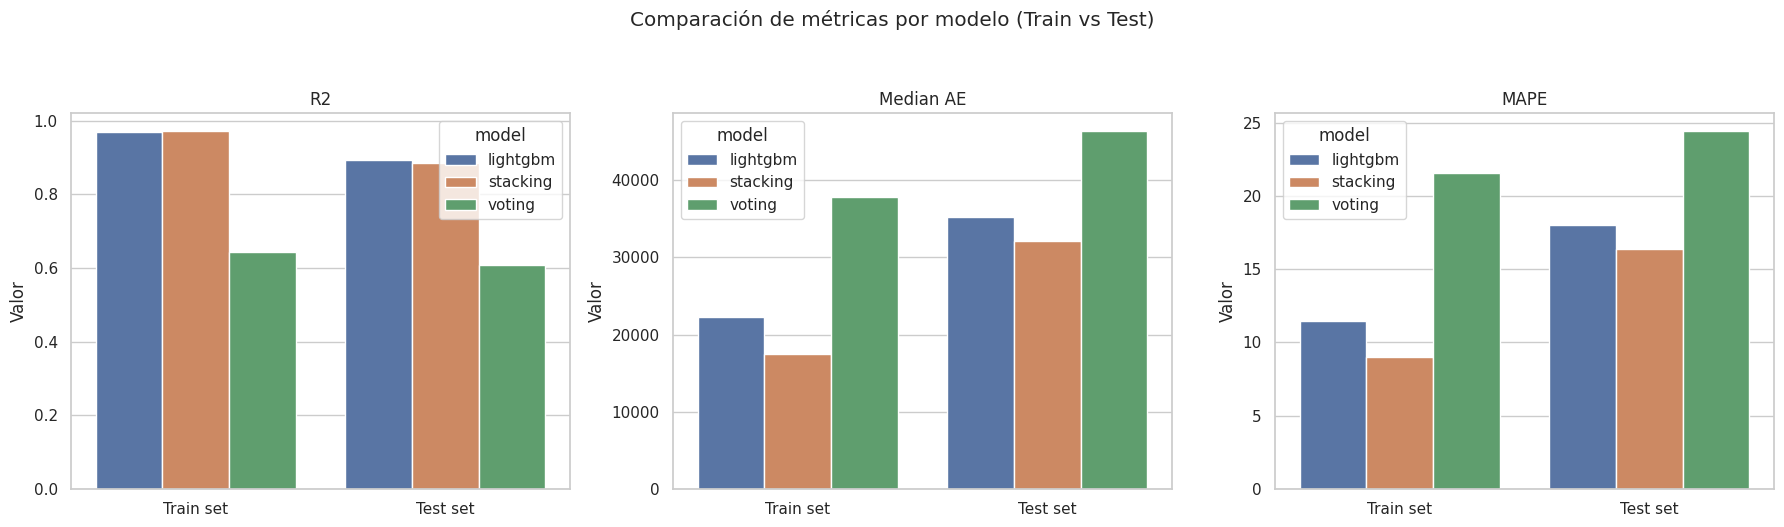

In [79]:
df_plot = df_long[df_long["set"].isin(["Train set", "Test set"])]
sns.set(style="whitegrid")

metrics = ["R2", "Median AE", "MAPE"]

fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=False)

for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=df_plot[df_plot["metric"] == metric],
        x="set", y="value", hue="model", ax=ax
    )
    ax.set_title(metric)
    ax.set_ylabel("Valor")
    ax.set_xlabel("")

fig.suptitle("Comparación de métricas por modelo (Train vs Test)", y=1.05)
plt.tight_layout()
plt.show()
